In [1]:
import json
import os
import cv2
from PIL import Image
import numpy as np

import scipy
from tqdm import tqdm
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
#from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2

import warnings
warnings.filterwarnings("ignore")

In [2]:
IMG_SIZE=224

In [62]:
def equalize_light(image, limit=2, grid=(16,16), gray=False):
    if (len(image.shape) == 2):
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        gray = True
    
    clahe = cv2.createCLAHE(clipLimit=limit, tileGridSize=grid)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))

    image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    if gray: 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return np.uint8(image)

def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x) #typically will be zero
    print(np.min(x))
    print(np.max(x))
    max_val = np.max(x) #typically will be 255
    x = (x-min_val) / (max_val-min_val)
    return x
def load_ben_color(path, sigmaX=10 ):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = equalize_light(image,3,(5,5))
    #image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    image=normalize(image)  
    return image

COVID IMAGE EXAMPLE

Run first without the image = equalize_light(image,3,(5,5))

10
255


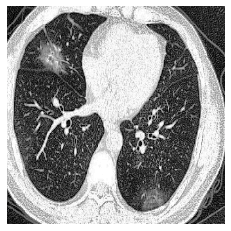

In [63]:
#example
imagefile='../Images-processed/CT_COVID/CT_COVID/2020.03.04.20031047-p12-81%3.png'
x=load_ben_color(imagefile,sigmaX=4)
plt.axis('off')
plt.imshow(x)

In [64]:
X_train = np.empty((2, IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)

In [65]:
X_train[0,:,:,:]=x

In [66]:
y=X_train[0,:,:,:]

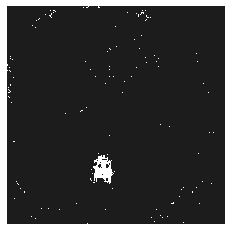

In [67]:
a=(y*(255-28))+28
plt.axis('off')
plt.imshow(a)

In [61]:
import collections
collections.Counter(a.flatten())

Counter({28: 149061, 255: 1467})

In [68]:
import collections
collections.Counter(a.flatten())

Counter({28: 148881, 255: 1647})

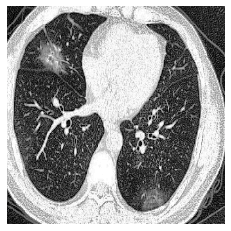

In [8]:
#example
imagefile='../Images-processed/CT_COVID/CT_COVID/2020.03.04.20031047-p12-81%3.png'
x=load_ben_color(imagefile,sigmaX=4)
plt.axis('off')
plt.imshow(x)

## Other images

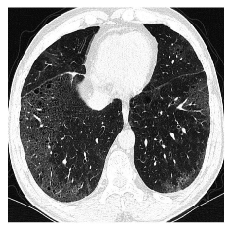

In [13]:
#example
imagefile='../Images-processed/CT_NonCOVID/CT_NonCOVID/3.jpg'
x=load_ben_color(imagefile,sigmaX=4)
plt.axis('off')
plt.imshow(x)

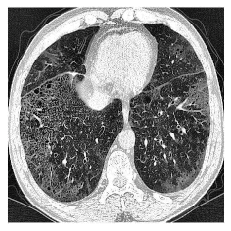

In [15]:
#example
imagefile='../Images-processed/CT_NonCOVID/CT_NonCOVID/3.jpg'
x=load_ben_color(imagefile,sigmaX=4)
plt.axis('off')
plt.imshow(x)